# The Perceptron

A perceptron is a linear classifier that iteratively computes the w that defines a hyperplane

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [0], [0], [1]])
print(f"Training data (features shape{X_train.shape}):\n{X_train}\n")
print(f"Training data (labels, shape{y_train.shape}):\n{y_train}")

Training data (features shape(4, 2)):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Training data (labels, shape(4, 1)):
[[0]
 [0]
 [0]
 [1]]


### Plotting data points

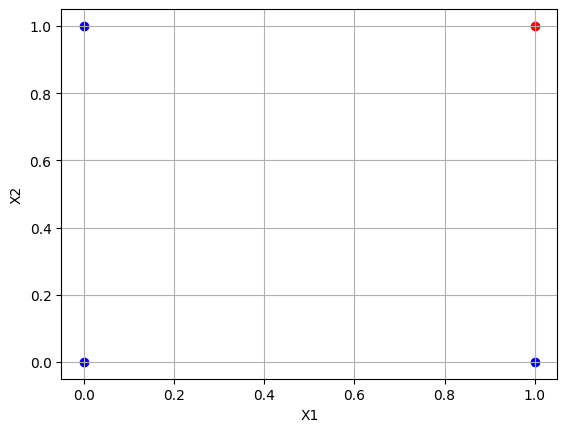

In [63]:
def plot_data(x: np.array, y: np.array) -> None:
    for i in range(len(X_train)):
        if y[i][0] == 0:
            plt.scatter(x[i][0], x[i][1], color='blue', label='Class 0')
        else: 
            plt.scatter(x[i][0], x[i][1], color='red', label='Class 1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()
plot_data(X_train, y_train)

### Step and linear function

In [64]:
def step(x: np.array) -> np.array:
    return np.where(x >= 0.0, 1, 0)

In [65]:
def linear(x: np.array, m: float, b: float) -> np.array:
    return x * m + b

### Variant 1: Handle weights and bias together

In [66]:
class Perceptron:
    def __init__(self, num_features: int) -> None:
        self.W = np.random.rand(num_features + 1, 1)    # (num_features + 1) x 1

    def __call__(self, X: np.array) -> int:
        bias_column = np.full((X.shape[0], 1), 1.0)
        X_b = np.hstack((X, bias_column)) 
        return step(np.dot(X_b, self.W))

    def train(self, X: np.array, y: np.array, epochs: int = 1, verbose: bool=True) -> None:
        for epoch in range(epochs):
            for i in range(len(X)):
                # Add bias.
                x = np.append(X[i:i+1], np.array([[1.0]]), axis=1)
                
                # Forward pass
                z = np.dot(x, self.W)
                if y[i] != step(z):
                    if z < 0.0:
                        self.W = self.W + x.T
                    else:
                        self.W = self.W - x.T
            if verbose:
                if epoch % 1 == 0:
                    print(f"Epoch: {epoch}\tLoss: {(y[i] - z).item()}")

In [67]:
and_gate = Perceptron(2)
print(f"Weights:\n{and_gate.W}\n")

Weights:
[[0.61247617]
 [0.70606768]
 [0.23835054]]



#### Hyperplane (green line) bevor training

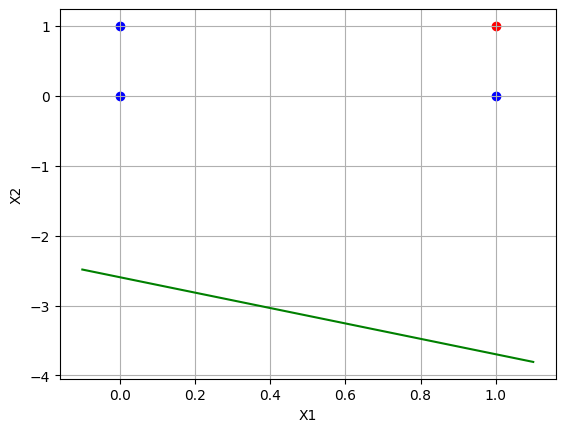

In [68]:
and_gate = Perceptron(2)
x = np.linspace(-0.1, 1.1, 100)
W = and_gate.W
m, b = -(W[0] / W[1]), -(W[2] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [69]:
and_gate.train(X_train, y_train, epochs=10)

Epoch: 0	Loss: 2.6040490989246017
Epoch: 1	Loss: 3.6040490989246017
Epoch: 2	Loss: 2.6040490989246017
Epoch: 3	Loss: 1.6040490989246017
Epoch: 4	Loss: 2.6040490989246017
Epoch: 5	Loss: 1.6040490989246017
Epoch: 6	Loss: 0.6040490989246017
Epoch: 7	Loss: 0.6040490989246017
Epoch: 8	Loss: 0.6040490989246017
Epoch: 9	Loss: 0.6040490989246017


#### Hyperplane (green line) after training.

In [70]:
print(f"Weights:\n{and_gate.W}\n")

Weights:
[[ 2.32735042]
 [ 1.29727447]
 [-3.228674  ]]



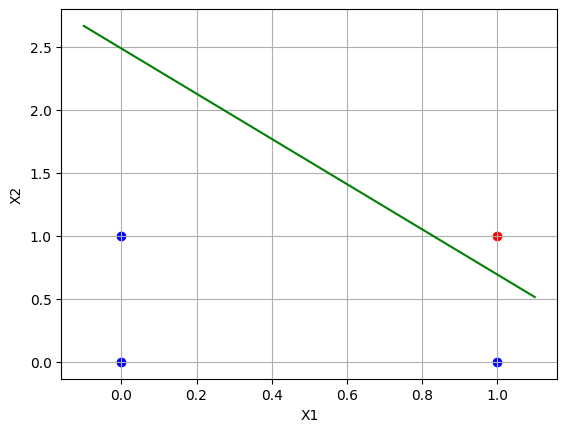

In [71]:
W = and_gate.W
m, b = -(W[0] / W[1]), -(W[2] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [72]:
print(and_gate(X_train))

[[0]
 [0]
 [0]
 [1]]


### Variant 2: Handle weights and bias separately

In [73]:
def step(x: np.array) -> np.array:
    return np.where(x >= 0.5, 1, 0)

In [74]:
class Perceptron:
    def __init__(self, num_features: int) -> None:
        self.W = np.random.rand(num_features, 1)
        self.B = np.random.rand(1, 1)

    def __call__(self, x: np.array) -> int:
        z = np.dot(x, self.W) + self.B
        return step(z)

    def train(self, X: np.array, y: np.array, epochs: int = 1, learning_rate: float=0.1, verbose: bool=True) -> None:
        for epoch in range(epochs):
            total_loss = 0 
            for i in range(len(X)):
                # Forward pass
                z = np.dot(X[i:i+1], self.W) + self.B

                # Backward pass
                error = y[i:i+1] - z
                total_loss += error ** 2    

                dW = 2 * error * X[i:i+1].T
                dB = 2 * error * 1

                # Update weights and bias. 
                self.W += learning_rate * dW
                self.B += learning_rate * dB

            if verbose:
                if epoch % 1 == 0:
                    print(f"Epoch: {epoch}\tLoss: {total_loss[0][0]}")

In [75]:
and_gate = Perceptron(2)
print(f"Weights:\n{and_gate.W}\n")
print(f"Bias:\n{and_gate.B}")

Weights:
[[0.21977954]
 [0.34525947]]

Bias:
[[0.82474034]]


### Hyperplane (green line) before training.

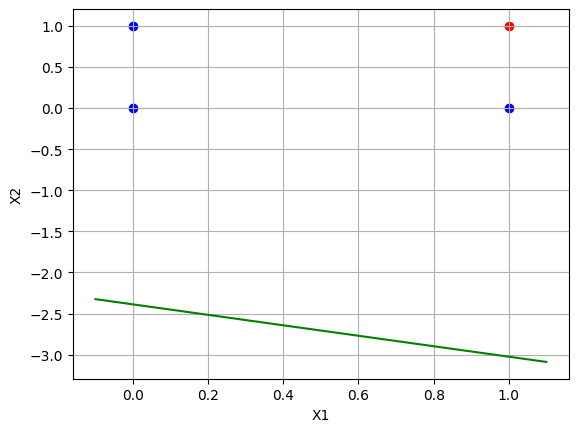

In [76]:
W, B = and_gate.W, and_gate.B
m, b = -(W[0] / W[1]), -(B[0] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [77]:
and_gate.train(X_train, y_train, epochs=10, learning_rate=0.1)

Epoch: 0	Loss: 2.3520258267883087
Epoch: 1	Loss: 1.0566913854395352
Epoch: 2	Loss: 0.8107803805489805
Epoch: 3	Loss: 0.6875568866477029
Epoch: 4	Loss: 0.6045855452319691
Epoch: 5	Loss: 0.5450030431838385
Epoch: 6	Loss: 0.5016745757548036
Epoch: 7	Loss: 0.47012459151648356
Epoch: 8	Loss: 0.44718426517805465
Epoch: 9	Loss: 0.43054525704413515


### Hyperplane (green line) after training.

In [78]:
print(f"Weights:\n{and_gate.W}\n")
print(f"Bias:\n{and_gate.B}")

Weights:
[[0.51405731]
 [0.45592997]]

Bias:
[[-0.14181649]]


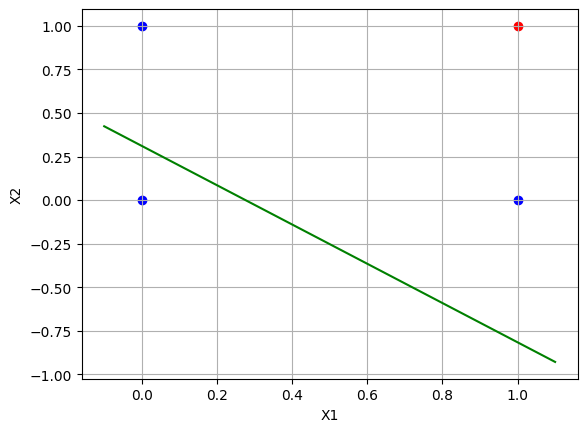

In [79]:
W, B = and_gate.W, and_gate.B
m, b = -(W[0] / W[1]), -(B[0] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [80]:
print(and_gate(X_train))

[[0]
 [0]
 [0]
 [1]]
